In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tools.portfolio import black_litterman, vectorize_corr

In [5]:
df = pd.read_pickle("data/asset_cc2.pkl")

rtn = np.log(df).diff().dropna() * 100
holding_rtn = (np.log(df) - np.log(df).shift(20)).shift(-20).dropna()["1997-05":] * 100
holding_cov = rtn.rolling(window=60).cov().shift(-120).dropna()
rolling_corr_matrix = rtn.rolling(window=60).corr().dropna()["1997-05":]
rolling_cov_matrix = rtn.rolling(window=60).cov().dropna()["1997-05":]

rtn = rtn["1997-05":]

In [11]:
corr_arr =  np.vstack(
    [
        vectorize_corr(rolling_corr_matrix.loc[d].values) 
        for d in rolling_corr_matrix.index.get_level_values(0).unique()
    ]
)

In [19]:
corr_arr.shape

(6986, 15)

In [15]:
best_score, best_k, best_labels = -1, None, None
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(corr_arr)
    s = silhouette_score(corr_arr, labels)
    if s > best_score:
        best_score, best_k, best_labels = s, k, labels

idxs = rolling_corr_matrix.index.get_level_values(0).unique()
labels_series = pd.Series(
    best_labels,
    index=idxs
)

In [50]:
km = KMeans(n_clusters=4)
labels = km.fit_predict(corr_arr)
    
idxs = rolling_corr_matrix.index.get_level_values(0).unique()
labels_series = pd.Series(
    labels,
    index=idxs
)

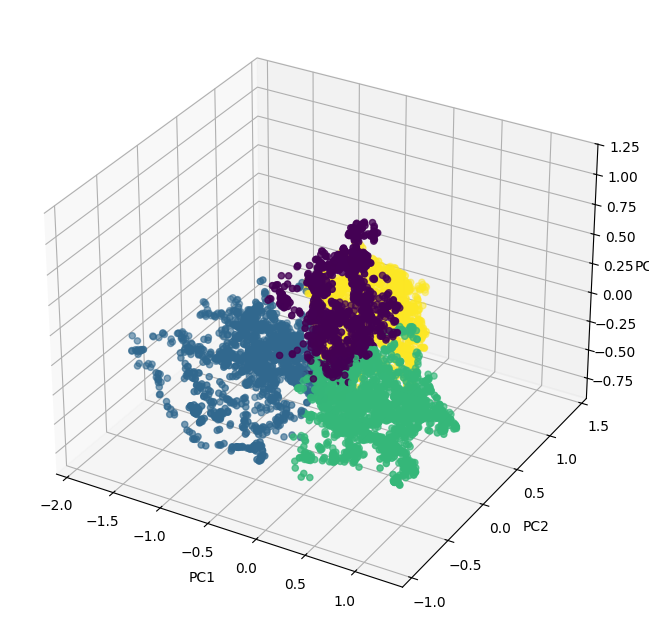

In [51]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Assuming corr_arr is already defined in the environment
# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
reduced = pca.fit_transform(corr_arr)

# Plot in 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2], c=labels_series.values)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


In [52]:
import plotly.express as px
import plotly.io as pio

# corr_arr: 실제 corr_arr ndarray, labels_series: pandas Series 형태의 레이블
# 예시로 대체하지 말고, 본인의 변수 그대로 사용하세요.

# renderer 설정: 브라우저 탭이나 외부 창으로 띄우기
pio.renderers.default = 'browser'

fig = px.scatter_3d(
    x=reduced[:, 0],
    y=reduced[:, 1],
    z=reduced[:, 2],
    color=labels_series.values.astype(str),
    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3'},
    title='3D PCA Scatter with Plotly'
)

# 초기 카메라 각도 조정
fig.update_layout(
    scene_camera=dict(
        eye=dict(x=1.5, y=1.5, z=1.0)
    )
)

fig.show()



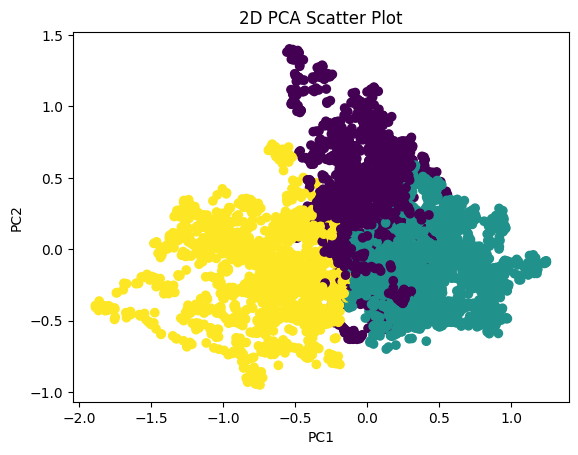

In [42]:
pca_2d = PCA(n_components=2)
reduced_2d = pca_2d.fit_transform(corr_arr)

# 2D 산점도 그리기
plt.figure()
plt.scatter(reduced_2d[:, 0], reduced_2d[:, 1], c=labels_series.values)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Scatter Plot')
plt.show()


In [17]:
labels_series.value_counts()

0    5194
1    1792
Name: count, dtype: int64